In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn

# Data

In [2]:
np.random.seed(2025)

m = 100

X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

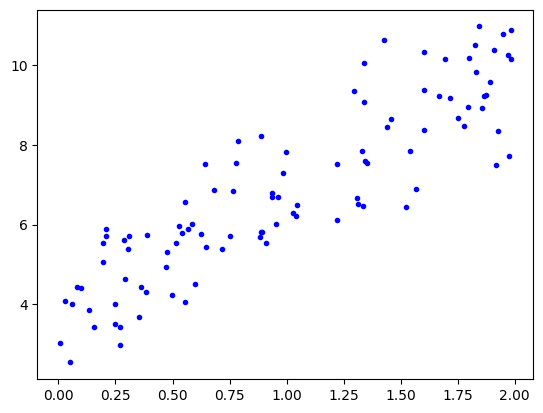

In [3]:
plt.plot(X, y, "b.")
plt.show()

## training and testing sets

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=2025)

In [5]:
X_train.shape, X_test.shape

((80, 1), (20, 1))

# Model Training

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([3.91524006]), array([[2.96600571]]))

## Training and testing MSE

In [8]:
from sklearn.metrics import mean_squared_error

train_pred = lin_reg.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred)

train_mse

0.9809806002079501

In [9]:
test_pred = lin_reg.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_mse

1.0794276592323748

# Polynomial Regression

In [15]:
import numpy as np
np.random.seed(2025)

m = 100
X = 6 * np.random.rand(m, 1) - 3

y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)


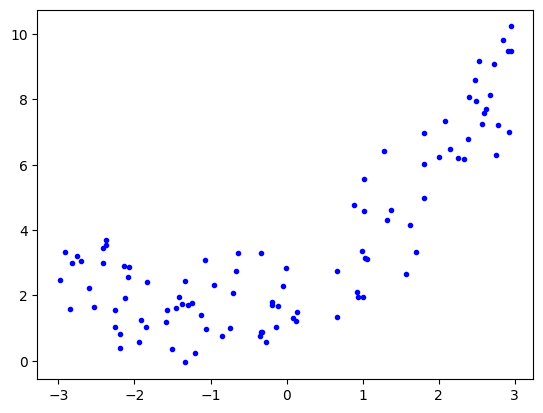

In [16]:
plt.plot(X, y, "b.")
plt.show()

In [17]:
X.shape

(100, 1)

## Polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

In [23]:
from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

# Cross validation

In [28]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=2025)
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=kf, scoring="neg_mean_squared_error")

print(-scores.mean())

2.965001507020056


In [30]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(len(degrees)):
    d = degrees[i]
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    kf = KFold(n_splits=5, shuffle=True, random_state=2025)
    reg = LinearRegression()
    scores = cross_val_score(reg, X_poly, y, cv=kf, 
                            scoring="neg_mean_squared_error")
    print(f"{d}-degree: cv mse = {-scores.mean()}")

1-degree: cv mse = 2.965001507020056
2-degree: cv mse = 1.0476399426432867
3-degree: cv mse = 1.11201353416839
4-degree: cv mse = 1.141152358064422
5-degree: cv mse = 1.1843721951841444
6-degree: cv mse = 1.2233976985704773
7-degree: cv mse = 1.2398207725630077
8-degree: cv mse = 1.3163351049736645
9-degree: cv mse = 1.4710007782064343
10-degree: cv mse = 1.3083680225075307


# Learning curve

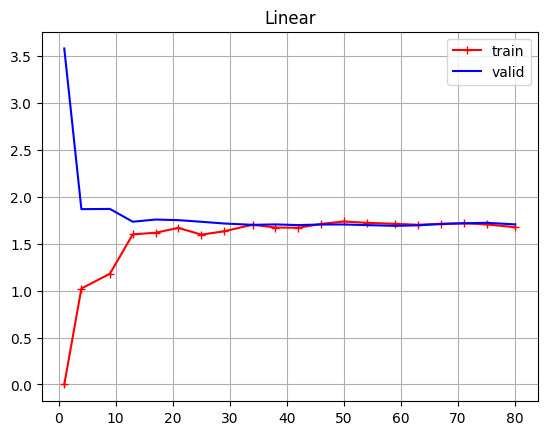

In [43]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 20),
    cv = 5, scoring="neg_root_mean_squared_error"
)

train_errors = - train_scores.mean(axis=1)
valid_errors = - valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="train")
plt.plot(train_sizes, valid_errors, "b-", label = "valid")
plt.legend(loc="upper right")
plt.title("Linear")
plt.grid()
plt.show()


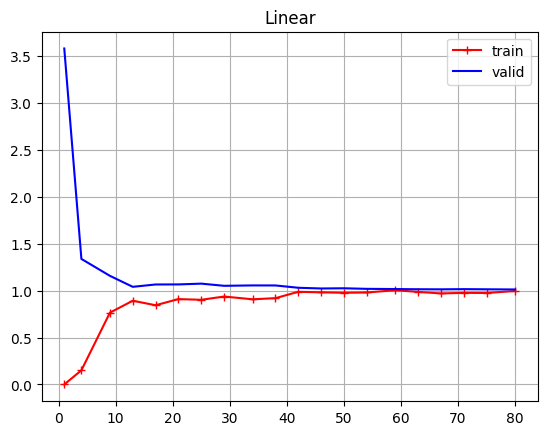

In [50]:
from sklearn.model_selection import learning_curve

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly, y, train_sizes=np.linspace(0.01, 1.0, 20),
    cv = 5, scoring="neg_root_mean_squared_error"
)

train_errors = - train_scores.mean(axis=1)
valid_errors = - valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="train")
plt.plot(train_sizes, valid_errors, "b-", label = "valid")
plt.legend(loc="upper right")
plt.title("Linear")
plt.grid()
plt.show()


# Ridge

In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.58794109]), array([[1.1148713]]))

In [57]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)

ridge.fit(X, y)
ridge.intercept_, ridge.coef_

(array([3.58770449]), array([1.08341639]))

# LASSO

In [59]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X, y)

lasso.intercept_, lasso.coef_

(array([3.58575724]), array([0.82454054]))

## Lasso to select variables

In [ ]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [62]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_poly, y)

lasso.intercept_, lasso.coef_

/Users/jw1412/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.498e+01, tolerance: 7.096e-02
  model = cd_fast.enet_coordinate_descent(


(array([2.34101668]),
 array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.91577451e-02,  2.13707023e-02, -6.64301567e-03, -9.70671859e-04,
         1.58105188e-05, -1.04669703e-04]))

## Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0, 0.01, 0.3, 0.5, 0.8, 1, 1.3, 2, 5]}

lass_grid = GridSearchCV(Lasso(), param_grid= params, cv=5)

lass_grid.fit(X_poly, y)

In [68]:
lass_grid.best_params_

{'alpha': 0.01}

In [69]:
X_poly

array([[-2.18707102e+00,  4.78327964e+00, -1.04613723e+01,
         2.28797641e+01, -5.00396689e+01,  1.09440310e+02,
        -2.39353730e+02,  5.23483605e+02, -1.14489582e+03,
         2.50396847e+03],
       [ 2.32711022e+00,  5.41544196e+00,  1.26023303e+01,
         2.93270116e+01,  6.82471883e+01,  1.58818729e+02,
         3.69588687e+02,  8.60073610e+02,  2.00148609e+03,
         4.65767872e+03],
       [ 2.59563384e+00,  6.73731503e+00,  1.74876029e+01,
         4.53914138e+01,  1.17819490e+02,  3.05816254e+02,
         7.93787018e+02,  2.06038045e+03,  5.34799321e+03,
         1.38814321e+04],
       [-3.26591016e-01,  1.06661692e-01, -3.48347502e-02,
         1.13767164e-02, -3.71553338e-03,  1.21345982e-03,
        -3.96305075e-04,  1.29429677e-04, -4.22705697e-05,
         1.38051883e-05],
       [-6.70586723e-01,  4.49686553e-01, -3.01553832e-01,
         2.02217996e-01, -1.35604704e-01,  9.09347138e-02,
        -6.09796118e-02,  4.08921181e-02, -2.74217115e-02,
         1.